In [6]:
#!/usr/bin/env python
# coding: utf-8

# =============================================================== #
# author: Yung-Hsin Chen, Chih-Fang Chou                          #
# copyright: Copyright 2018, Academia Sinica Internship Project   #                                                   #
# =============================================================== #

# import modules
from scipy.special import erf, erfinv, gammainc
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from scipy.special import gamma, factorial

## Mapping function (per signal)

In [109]:
def f(x, a, t):
    return x**(a) / t

## Mapping score

In [110]:
def Mapping(m, delta, alpha):
    mapping_list = []
    S = np.linspace(0.01, 1, 1000)
    for i in S:
        mapping_list.append(f(score(0.01, m, delta, i), alpha, i))
    return mapping_list

## Score

In [9]:
def score(B, m, db, x):
    s = (x - B) / B**0.5
    a = erfinv(0.98) / db
    return (erf(a*(s - m)) + 1) * 0.5

## Plot

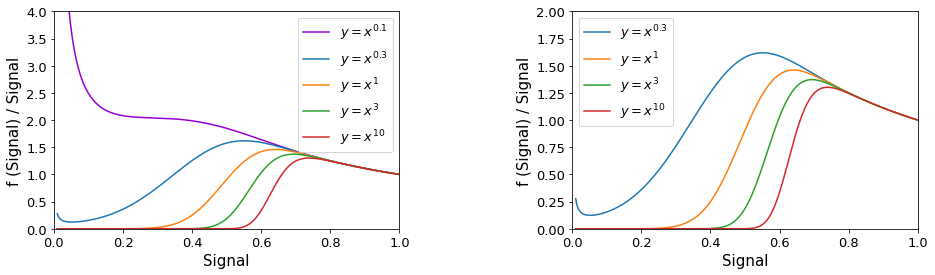

In [111]:
S = np.linspace(0.01, 1, 1000)

plt.subplot(121)
plt.plot(S, Mapping(5, 2, 0.1), 'darkviolet', label = r'$y = x^{0.1}$')
plt.plot(S, Mapping(5, 2, 0.3), label = r'$y = x^{0.3}$')
plt.plot(S, Mapping(5, 2, 1), label = r'$y = x^{1}$')
plt.plot(S, Mapping(5, 2, 3), label = r'$y = x^{3}$')
plt.plot(S, Mapping(5, 2, 10), label = r'$y = x^{10}$')
plt.xlabel('Signal', fontsize = 15)
plt.ylabel('f (Signal) / Signal', fontsize = 15)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylim(0, 4)
plt.xlim(0, 1)

plt.subplot(122)
plt.plot(S, Mapping(5, 2, 0.3), label = r'$y = x^{0.3}$')
plt.plot(S, Mapping(5, 2, 1), label = r'$y = x^{1}$')
plt.plot(S, Mapping(5, 2, 3), label = r'$y = x^{3}$')
plt.plot(S, Mapping(5, 2, 10), label = r'$y = x^{10}$')
plt.xlabel('Signal', fontsize = 15)
plt.ylabel('f (Signal) / Signal', fontsize = 15)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylim(0, 2)
plt.xlim(0, 1)

plt.subplots_adjust(left = 0, right = 2, wspace = 0.5)
plt.show()

## $\alpha$ lower limit

In [113]:
def alpha_lower(B, m, delta):
    a_lower = 0
    a = np.linspace(0.001, 10, 1000)
    for j in a:
        b = np.linspace(B, B+9*B**(1/2), 1000)
        if (b[np.argmax(f(score(B, m, delta, b), j, b))] - B) / B**(1/2) != 0:
            a_lower = j
            break
    return a_lower

# take background = 0.01 for instance
B1 = 0.01
print('alpha lower limit = ', alpha_lower(B1, 5, 2))

alpha lower limit =  0.21118918918918922


## $\alpha$ upper limit

In [119]:
def alpha_upper(B, m, delta):
    a_upper = 0
    a = np.linspace(100, 150, 1000)
    for j in a:
        b = np.linspace(B, B+9*B**(1/2), 1000)
        if (b[np.argmax(f2(score(B, m, delta, b), j, b))] - B) / B**(1/2) > 8:
            a = a.tolist()
            a_upper = a[a.index(j)-1]
            break
    return a_upper

# take background = 0.01 for instance
B1 = 0.01
print('alpha lower limit = ', alpha_upper(B1, 5, 2))

alpha lower limit =  119.26926926926927


## $\alpha$ with respect to different backgrounds

In [123]:
def alpha_lower_general():
    B = np.linspace(0.001, 1, 500)
    alpha_lower_list = []
    for i in B:
        alpha_lower_list.append(alpha_lower(i, 5, 2))
    return alpha_lower_list

def alpha_upper_general():
    B = np.linspace(0.001, 1, 500)
    alpha_upper_list = []
    for i in B:
        alpha_upper_list.append(alpha_upper(i, 5, 2))
    return alpha_upper_list

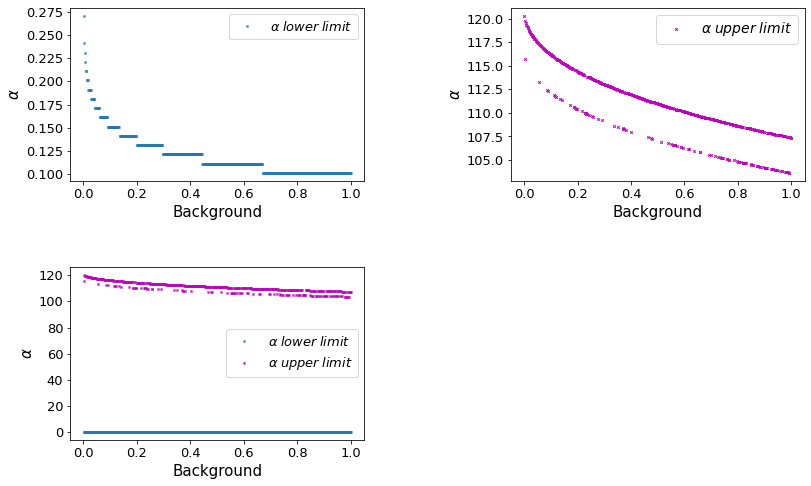

In [162]:
plt.subplot(221)
alpha = np.linspace(0.001, 1, 500)
plt.plot(alpha, Alower(), 'x', markersize = 2, label = r'$\alpha\;lower\;limit$')
plt.xlabel('Background', fontsize = 15)
plt.ylabel(r'$\alpha$', fontsize = 15)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(222)
B = np.linspace(0.001, 1, 500)
plt.plot(B, alpha_upper_general(), 'mx', markersize = 2.5, label = r'$\alpha\;upper\;limit$')
plt.xlabel('Background', fontsize = 15)
plt.ylabel(r'$\alpha$', fontsize = 15)
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(223)
plt.plot(B, alpha_lower_general(), 'x', markersize = 2, label = r'$\alpha\;lower\;limit$')
plt.plot(B, alpha_upper_general() ,'mx', markersize = 2, label = r'$\alpha\;upper\;limit$')
plt.xlabel('Background', fontsize = 15)
plt.ylabel(r'$\alpha$', fontsize = 15)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplots_adjust(left = 0, right = 1.7, wspace = 0.5, hspace = 0.5, top = 0, bottom = -1.5)
plt.show()

## Optimised signal and optimised std for each background

In [132]:
def Signal(B, m, delta, alpha):
    op_signal = []
    op_std = []
    for i in B:
        signal = np.linspace(i, i+9*i**(1/2), 1000)    
        op_signal.append(signal[np.argmax(f(score(i, m, delta, signal), alpha, signal))]) 
        op_std.append((signal[np.argmax(f(score(i, m, delta, signal), alpha, signal))] - i) / (i)**(1/2))
    return op_signal, op_std

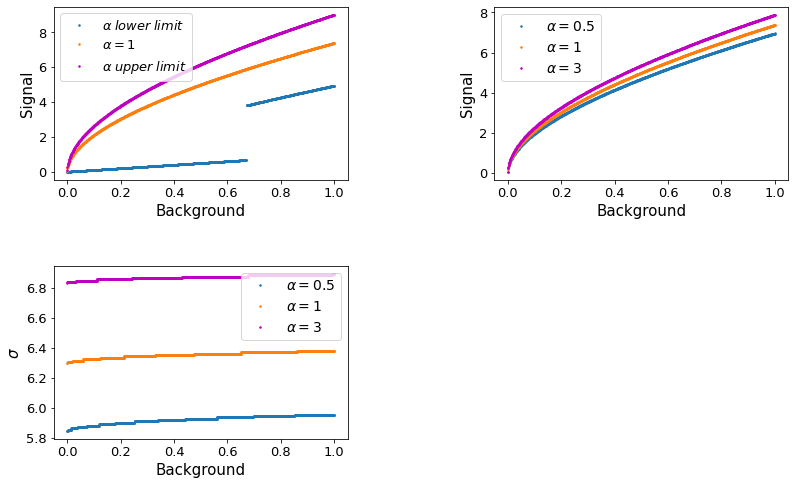

In [161]:
Background = np.linspace(0.0001, 1, 1000)

plt.subplot(221)
plt.plot(Background, Signal(Background, 5, 2, alpha_lower(Background.any(), 5, 2))[0], 'o', markersize = 1.5, label = r'$\alpha\;lower\;limit$')
plt.plot(Background, Signal(Background, 5, 2, 1)[0], 'o', markersize = 1.5, label = r'$\alpha = 1$')
plt.plot(Background, Signal(Background, 5, 2, alpha_upper(Background.any(), 5, 2))[0], 'mo', markersize = 1.5, label = r'$\alpha\;upper\;limit$')
plt.xlabel('Background', fontsize = 15)
plt.ylabel('Signal', fontsize = 15)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(222)
plt.plot(Background, Signal(Background, 5, 2, 0.5)[0], 'o', markersize = 1.5, label = r'$\alpha = 0.5$')
plt.plot(Background, Signal(Background, 5, 2, 1)[0], 'o', markersize = 1.5, label = r'$\alpha = 1$')
plt.plot(Background, Signal(Background, 5, 2, 3)[0], 'mo', markersize = 1.5, label = r'$\alpha = 3$')
plt.xlabel('Background', fontsize = 15)
plt.ylabel('Signal', fontsize = 15)
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(223)
plt.plot(Background, Signal(Background, 5, 2, 0.5)[1], 'o', markersize = 1.5, label = r'$\alpha = 0.5$')
plt.plot(Background, Signal(Background, 5, 2, 1)[1], 'o', markersize = 1.5, label = r'$\alpha = 1$')
plt.plot(Background, Signal(Background, 5, 2, 3)[1], 'mo', markersize = 1.5, label = r'$\alpha = 3$')
plt.xlabel('Background', fontsize = 15)
plt.ylabel(r'$\sigma$', fontsize = 15)
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplots_adjust(left = 0, right = 1.7, wspace = 0.5, hspace = 0.5, top = 0, bottom = -1.5)
plt.show()